# Comparing Groups in a Practical Context

Our goal is to determine whether the users described in the desktop dataframe
and the users described in the laptop dataframe differ significantly from each
other

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

desktop = pd.read_csv('desktop.csv')
laptop = pd.read_csv('laptop.csv')

In [ ]:
desktop.head()

,userid,spending,age,visits
0,1,1250,31,126
1,2,900,27,5
2,3,0,30,459
3,4,2890,22,18
4,5,1460,38,20


In [ ]:
laptop.head()

,userid,spending,age,visits
0,31,1499,32,12
1,32,799,23,40
2,33,1200,45,22
3,34,0,59,126
4,35,1350,17,85


**userid** - contains a unique number identifying a particular user

**spending** - contains a record of how much that user has spent at your companies website

**age** - holds the users age

**visits** - holds the number of times the user has visited pages on your website

We can start with a plot of the amounts that subscribers to each list have spent on the company's products:

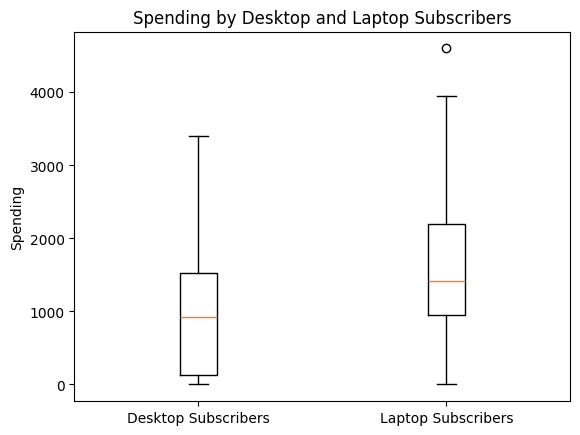

In [ ]:
sns.reset_orig()
fig1, ax1 = plt.subplots()
ax1.boxplot([desktop['spending'].values, laptop['spending'].values])
ax1.set_title('Spending by Desktop and Laptop Subscribers')
ax1.set_ylabel('Spending')
plt.xticks([1,2], ['Desktop Subscribers', 'Laptop Subscribers'])
plt.show()

In [ ]:
desktop.describe()

,userid,spending,age,visits
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1028.666667,35.766667,210.800000
std,8.803408,907.411032,15.199100,311.468203
min,1.000000,0.000000,14.000000,5.000000
25%,8.250000,127.500000,25.500000,46.750000
50%,15.500000,925.000000,32.000000,100.000000
75%,22.750000,1528.250000,44.250000,145.000000
max,30.000000,3400.000000,79.000000,1256.000000


In [ ]:
laptop.describe()

,userid,spending,age,visits
count,30.000000,30.000000,30.000000,30.000000
mean,45.500000,1624.566667,38.733333,193.900000
std,8.803408,1252.884222,17.104009,323.071611
min,31.000000,0.000000,16.000000,6.000000
25%,38.250000,957.500000,25.000000,39.250000
50%,45.500000,1419.500000,33.000000,77.500000
75%,52.750000,2199.750000,49.750000,126.000000
max,60.000000,4600.000000,79.000000,1250.000000


The results reveal that the mean desktop subscriber is about 35.8
years old, and the mean laptop subscriber is about 38.7 years old. We can
conclude that these groups are different, in the sense that they’re not identical.

But it’s not clear whether the groups are different enough that we should tell our marketing group to create two separate emails instead of one. To make that
judgment, we need to use our hypothesis-testing framework

**Hypothesis 0** The two email lists are random samples from the same population

**Hypothesis 1** The two email lists are not random samples from the same population

Hypothesis 0, our null hypothesis, is describing a world in which there’s a
population of people who are interested in computers, both laptops and desktops.

People from this population sign up for your company’s email lists occasionally.
But when they sign up for a list, they choose completely at random which of
your two lists they sign up for. In this world, your lists have superficial
differences, but they are truly two random samples from the same population and
don’t differ in any essential ways that would warrant different treatment by your company.

Hypothesis 1, the alternative hypothesis, describes a world in which the null
hypothesis is not true. This would mean that your subscribers’ membership on
different email lists is the result at least partially of underlying differences in people who like desktops and people who like laptops.

If Hypothesis 0 is true, it would be reasonable to send the same marketing email to both groups. If Hypothesis 1 is true, sending different marketing emails to each group makes more sense.

A business decision now depends on the result of a statistical test.
Let’s run our t-test and see whether our two subscriber groups actually differ
from each other. First, we should specify a significance level. Let’s use the 5
percent significance level that’s common in research.


In [ ]:
scipy.stats.ttest_ind(desktop['spending'], laptop['spending'])

TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621095, df=58.0)

When you look at the results from our t-test, you can see that our p-value is
about 0.04. Since we use the common 5 percent significance level, this p-value is low enough for us to conclude that the desktop and laptop groups are not random draws from the same population, so we can reject the null hypothesis. It appears that desktop and laptop email subscribers are at least slightly different in a detectable way.


## Running experiments to test new hypotheses

Suppose we’re interested in studying whether changing the color of text in our
marketing emails from black to blue will increase the revenue we earn as a result of the emails.

**Hypothesis 0** Changing the color of text in our emails from black to blue will
have no effect on revenues.

**Hypothesis 1** Changing the color of text in our emails from black to blue will lead to a change in revenues (either an increase or a decrease).

To do the hypothesis test we just outlined, we’ll
need data from two groups: a group that has received a blue-text email and a
group that has received a black-text email. We’ll need to know how much
revenue we received from each member of the group that received the blue-text
email and how much revenue we received from each member of the group that
received the black-text email.

## Splitting groups based on age


In [ ]:
medianage = np.median(desktop['age'])
groupa = desktop.loc[desktop['age'] <= medianage,:]
groupb = desktop.loc[desktop['age'] > medianage,:]

After creating groupa and groupb, you can send these two dataframes to your
marketing team members and instruct them to send different emails to each
group. Suppose they send the black-text email to groupa and the blue-text email
to groupb. In every email, they include links to new products they want to sell,
and by tracking who clicks which links and their purchases, the team members
can measure the total revenue earned from each individual email recipient.

In [ ]:
emailresults1 = pd.read_csv('emailresults1.csv')
emailresults1.head()

,userid,revenue
0,1,100
1,2,0
2,3,50
3,4,550
4,5,175


It will be useful to have this new revenue information in the same dataframe
as our other information about each user. Let’s join the datasets:


In [ ]:
groupa_withrevenue = groupa.merge(emailresults1, on='userid')
groupb_withrevenue = groupb.merge(emailresults1, on='userid')

After preparing our data, it’s simple to perform a t-test to check whether our
groups are different.

In [ ]:
scipy.stats.ttest_ind(groupa_withrevenue['revenue'], groupb_withrevenue['revenue'])

TtestResult(statistic=-2.186454851070545, pvalue=0.03730073920038287, df=28.0)

We can see that the result says that p = 0.037, approximately.
Since p < 0.05, we can conclude that this is a statistically significant difference.
We can check the size of the difference:


In [ ]:
print(np.mean(groupb_withrevenue['revenue'])-np.mean(groupa_withrevenue['revenue']))

125.0


The output is 125.0. The average groupb customer has outspent the average
groupa customer by 125 dollars. This difference is statistically significant, so we reject Hypothesis 0 in favor of Hypothesis 1, concluding (for now, at least) that the
blue text in marketing emails leads to about $125 more in revenue per user than
black text.


What we have just done was an experiment. We split a population into two
groups, performed different actions on each group, and compared the results. In
the context of business, such an experiment is often called an A/B test. The A/B
part of the name refers to the two groups, Group A and Group B, whose different
responses to emails we compared. Every A/B test follows the same pattern we
went through here: a split into two groups, application of a different treatment
(for example, sending different emails) to each group, and statistical analysis to
compare the groups’ outcomes and draw conclusions about which treatment is
better.


Now that we’ve successfully conducted an A/B test, we may want to conclude
that the effect of blue text is to increase spending by $125. However, something
is wrong with the A/B test we ran: it’s confounded.

## Avoiding Confounded Experimental Design

Let’s perform an A/B test on our laptop subscriber list, but this time we’ll use
randomization to select our groups to avoid having a confounded experimental
design. Suppose that in this new A/B test, we want to test whether adding a
picture to a marketing email will improve revenue. We can proceed just as we
did before: we split the laptop subscriber list into two subgroups, and we send
different emails to each subgroup. The difference is that this time, instead of
splitting based on age, we perform a random split:

In [ ]:
np.random.seed(18811015)

laptop.loc[:,'groupassignment1'] = (np.random.random(len(laptop.index))>0.5)

groupc = laptop.loc[laptop['groupassignment1']==0, :].copy()
groupd = laptop.loc[laptop['groupassignment1']==1, :].copy()

In this snippet, we use the NumPy random.random() method to generate a
column that consists of randomly generated 0s and 1s. We can interpret a 0 to
mean that a user belongs to Group C, and a 1 to mean that a user belongs to
group D. When we generate 0s and 1s randomly like this, the groups could end
up with different sizes.

After generating this random column of 0s and 1s that indicates the group
assignment of each customer, we create two smaller dataframes, groupc and
groupd, that contain user IDs and information about the users in each subgroup.
You can send the group membership information to your marketing team
members and ask them to send the right emails to the right groups. One group,
either C or D, should receive an email without a picture, and the other group,
either D or C, should receive an email with a picture. Then, suppose that the
marketing team sends you a file containing the results of this latest A/B test

In [ ]:
emailresults2 = pd.read_csv('emailresults2.csv')

Join our email results to our group dataframes, just as we did before:

In [ ]:
groupc_withrevenue = groupc.merge(emailresults2, on='userid')
groupd_withrevenue = groupd.merge(emailresults2, on='userid')

In [ ]:
scipy.stats.ttest_ind(groupc_withrevenue['revenue'], groupd_withrevenue['revenue'])

TtestResult(statistic=-2.381320497676198, pvalue=0.024288828555138562, df=28.0)

We find that the p-value is less than 0.05, indicating that the difference
between the groups is statistically significant. This time, our experiment isn’t
confounded, because we used random assignment to ensure that the differences
between groups are the result of our different emails, not the result of different
characteristics of each group. Since our experiment isn’t confounded, and since
we find a significant difference between the revenues earned from Group C and
Group D, we conclude that including the picture in the email has a nonzero
effect. If the marketing team tells us that it sent the picture only to Group D, we
can find the estimated size of the effect easily:

In [ ]:
np.mean(groupd_withrevenue['revenue'])-np.mean(groupc_withrevenue['revenue'])

260.3333333333333

## Optimizing with the Champion/Challenger Framework

 - If the champion performs better than the challenger, the champion retains its champion status.

- If the challenger performs better than the
champion, that challenger becomes the new champion

This process can continue indefinitely: we have a champion that represents the
state of the art of whatever we’re doing (marketing emails, in this case). We
constantly test the champion by putting it in direct competition with a succession of challengers in A/B tests.

- Each challenger that leads to significantly better
outcomes than the champion becomes the new champion and is, in turn, put into
competition against new challengers later.

This endless process is called the champion/challenger framework for A/B
tests. It’s meant to lead to continuous improvement, continuous refinement, and
asymptotic optimization to get to the best-possible performance in all aspects of business.

The biggest tech companies in the world run literally hundreds of A/B
tests per day, with hundreds of challengers taking on hundreds of champions,
sometimes defeating them and sometimes being defeated. The
champion/challenger framework is a common approach for setting up and
running A/B tests for the most important and most challenging parts of your
business.


## Preventing mistakes with Twyman's Law and A/A Testing

 - The inevitability of mistakes should lead us to be naturally suspicious of
anything that seems too good, bad, interesting, or strange to be true.

- This natural
suspicion is advocated by Twyman’s law, which states that “any figure that looks
interesting or different is usually wrong.”

This law has been restated in several
ways, including “any statistic that appears interesting is almost certainly a
mistake” and “the more unusual or interesting the data, the more likely it is to
have been the result of an error.”

Besides extreme carefulness and natural suspicion of good news, we have
another good way to prevent the kinds of interpretive mistakes that Twyman’s
law warns against: A/A testing.

This type of testing is just what it sounds like; we
go through the steps of randomization, treatment, and comparison of two groups
just as in A/B testing, but instead of sending two different emails to our two
randomized groups, we send the identical email to each group.

In this case, we
expect the null hypothesis to be true, and we won’t be gullibly convinced by a
group that appears to get $100,000 more revenue than the other group.
If we consistently find that A/A tests lead to statistically significant
differences between groups, we can conclude that our process has a problem: a
database gone haywire, a t-test being run incorrectly, an email being pasted
wrong, randomization performed incorrectly, or something else.

An A/A test
would also help us realize that the first test described in this chapter (where
Group A consists of younger people and Group B consists of older people) was
confounded, since we would know that differences between the results of an A/A
test must be due to the differences in age rather than differences between emails.

A/A testing can be a useful sanity check that can prevent us from getting carried
away by the kind of unusual, interesting, too-good-to-be-true results that
Twyman’s law warns us about.


## Understanding Effect Sizes

In the first A/B test we ran, we observed a difference of 125 dollars between the Group
A users who received a black-text email and the Group B users who received a
blue-text email. This $125 difference between groups is also called the A/B test’s

effect size. It’s natural to try to form a judgment about whether we should
consider this 125 dollar effect size a small effect, a medium effect, or a large effect.

To judge whether an effect is small or large, we have to compare it to
something else. Consider the following list of nominal GDP figures (in US
dollars, as of 2019) for Malaysia, Myanmar, and the Marshall Islands,
respectively:

In [ ]:
gdps = [365303000000, 65994000000, 220000000]

When we look at these numbers, $125 starts to seem pretty small. For
example, consider the standard deviation of our gdps list:

In [ ]:
import numpy as np

np.std(gdps)

158884197328.32672

The standard deviation is a common way to measure how dispersed a
dataset is. If we observe a difference between two countries’ GDPs that’s about
80 billion dollars, we don’t think of that as outrageously big or outrageously small,
because it means those countries are about half of a standard deviation apart, a
common magnitude of difference. Instead of expressing the difference as an $80
billion difference, you might say that the two countries’ GDPs differed by about
half of a standard deviation, and expect to be understood by anyone with some
statistical training.


When we talk about the 125 dollars effect size of our A/B test, let’s try to think of it
in terms of standard deviations as well. Compared to the standard deviation of
the GDP measurements we’ve seen, $125 is small potatoes:

In [ ]:
125/np.std(gdps)

7.867365169217765e-10

The output is about 7.9 · 10
–10
, which shows us that the 125 dollar effect size is a
little more than 1 one-billionth of the standard deviation of our GDP figures.
Compared to the world of GDP measurements, a $125 difference in GDP is like
being a micrometer taller than your friend—not even enough to notice without
extremely precise measurement technology

By contrast, suppose we conduct a survey of the prices of burgers at local
restaurants. Maybe we find the following prices:

In [ ]:
burgers = [9.00, 12.99, 10.50]

np.std(burgers)

1.6455394252341695

The standard deviation of our burger price data is about 1.65. So, two
countries’ GDPs differing by about 80 billion is roughly comparable to two
burger prices differing by about 80 cents: both represent about half of a standard
deviation in their respective domains. When we compare a $125 effect size to
this, we see that it’s huge:

In [ ]:
125/np.std(burgers)

75.96293232671214

We see that 125 is about 75.9 burger price standard deviations. Seeing a $125
difference in burger prices in your town is therefore something like seeing a man
who is over 20 feet tall—unheard of.
By measuring our effect size in terms of the standard deviation of different
datasets, we can easily make comparisons, not just between different domains
with the same units (GDP in dollars versus burger prices in dollars) but also
between different domains that use totally different units (burger prices in dollars
versus height in inches). The metric we’ve calculated several times here—an
effect size divided by a relevant standard deviation—is called Cohen’s d, a
common metric for measuring effect sizes. Cohen’s d is just the number of
standard deviations that two populations’ means are apart from each other. We
can calculate Cohen’s d for our first A/B test as follows:

In [ ]:
125/np.std(emailresults1['revenue'])

0.763769235188029

We see that the result is about 0.76. A common convention when we’re
working with Cohen’s d is to say that if Cohen’s d is about 0.2 or lower, we have
a small effect; if Cohen’s d is about 0.5, we have a medium effect; and if
Cohen’s d is around 0.8 or even higher, we have a large effect. Since our result is
about 0.76—quite close to 0.8—we can say that we’re working with a large
effect size.


## Calculating the Significance of Data

The probability that a correctly run A/B test will reject a false null hypothesis
is called the A/B test’s statistical power. If changing the color of text leads to a
125 increase in revenue per user, we can say that 125 is the effect size, and
since the effect size is nonzero, we know the null hypothesis (that changing the
text color has no effect on revenue) is false. But if we study this true effect by
using a sample of only three or four email subscribers, it’s very possible that, by
chance, none of these subscribers purchase anything, so we fail to detect the true
125 effect. By contrast, if we study the effect of changing the text color by
using an email list of a million subscribers, we’re much more likely to detect the
$125 effect and measure it as statistically significant. With the million-subscriber
list, we have greater statistical power.
We can import a module into Python that makes calculating statistical power
easy:


In [ ]:
from statsmodels.stats.power import TTestIndPower

To calculate power with this module, we’ll need to define parameters for the
three things that determine statistical significance

In [ ]:
alpha = 0.05 # statistical significance threshold

We choose the standard 0.05 threshold for alpha, as is standard in much
empirical research. We also need to define our sample size. Suppose we’re
running an A/B test on a group of email subscribers that consists of 90 people
total. That means we’ll have 45 people in Group A and 45 people in Group B, so
we define the number of observations in each of our groups as 45. We’ll store
this number in a variable called nobs, short for number of observations:

In [ ]:
nobs = 45

We also have to define an estimated effect size. In our previous A/B test, we
observed an effect size of $125. However, for the statistical power calculations
this module performs, we can’t express the effect size in dollar units or units of
any other currency. We’ll use Cohen’s d instead, and we’ll specify a medium
size:


In [ ]:
effectsize = 0.5

Finally, we can use a function that will take the three parameters we’ve
defined and calculate the statistical power we should expect:

In [ ]:
analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effectsize, nobs1=nobs, alpha=alpha)

print(power)

0.6501855019775578


If you run print(power), you can see that the estimated statistical power for
our hypothetical A/B test is about 0.65. This means that we expect about a 65
percent chance of detecting an effect from our A/B test and about a 35 percent
chance that even though a true effect exists, our A/B test doesn’t find it. These
odds might seem unfavorable if a given A/B test is expected to be expensive;
you’ll have to make your own decisions about the minimum level of power that
is acceptable to you. Power calculations can help at the planning stage to
understand what to expect and be prepared. One common convention is to
authorize only A/B tests that are expected to have at least 80 percent power.
You can also use the same solve_power() method we used in the previous
snippet to “reverse” the power calculation: you’d start by assuming a certain
power level and then calculate the parameters required to achieve that level of
statistical power. For example, in the following snippet, we define power, alpha,
and our effect size, and run the solve_power() command not to calculate the
power but to calculate observations, the number of observations we’ll need in
each group to achieve the power level we specified:


In [ ]:
analysis = TTestIndPower()
alpha = 0.05
effect = 0.5
power = 0.8
observations = analysis.solve_power(effect_size=effectsize, power=power, alpha=alpha)
print(observations)

63.7656117754095


If you run print(observations), you’ll see that the result is about 63.8. This
means that if we want to have 80 percent statistical power for our planned A/B
test, we’ll need to recruit at least 64 participants for both groups. Being able to
perform these kinds of calculations can be helpful in the planning stages of A/B
tests.
